In [4]:
import tensorflow as tf

from vahun.corpus import Corpus
import numpy as np

from vahun.tools import Timer
from vahun.tools import explog
from vahun.autoencoders import Autoencoder_ffnn
from vahun.genetic import evolution
from vahun.genetic import experiment

encode=10
dictsize=1000000
popsize=40


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.gpu_options.per_process_gpu_memory_fraction=1
corp_path="/mnt/permanent/Language/Hungarian/Corp/Webkorpusz/webkorpusz.wpl"#'/home/velkey/corp/webkorpusz.wpl'
corp=Corpus(corpus_path=corp_path,
            needed_corpus=["hun_lower"],
            language="Hun",size=dictsize,encoding_len=10)
database=corp.hun_lower
all_features=corp.featurize_data_charlevel_onehot(database)
train=all_features[0:int(len(all_features)*0.8)]
test=all_features[int(len(all_features)*0.8):len(all_features)]
x_train = train.reshape((len(train), np.prod(train.shape[1:])))
x_test = test.reshape((len(test), np.prod(test.shape[1:])))
print(x_train.shape)

logger=explog(encoder_type="Demo_"+str(encode),
              encoding_dim=encode,feature_len=10,
              lang="Hun",unique_words=len(set(database)),
              name="demo"+str(encode),population_size=popsize,
              words=len(corp.hun_lower))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

exp=experiment(encoded_width=10,layermax=10,layermin=2,maxw=10,minw=3,out_dim=360)
exp.weights=[348, 254, 10, 254, 348, 360]
exp.len=len(exp.weights)

Corpus initalized, fields: ['hun_lower'] 
Unique words:  531
(586, 360)


In [5]:
encoder=Autoencoder_ffnn(experiment=exp,
                 logger=logger,tf_session=sess,
                 inputdim=360,
                 layerlist=exp.weights,
                 encode_index=int(exp.len/2-1),
                 optimizer =tf.train.AdamOptimizer(learning_rate = 0.001),
                 nonlinear=tf.sigmoid)

In [6]:
encoder.train(x_train,x_test,512,50)

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
%matplotlib inline

def show_performance(encoder,data,length=0,inputdepth=10,inputfsize=36):
    if isinstance(data,list):
        handmade=corp.featurize_data_charlevel_onehot(data)
        data=handmade.reshape((len(handmade), np.prod(handmade.shape[1:])))
        if length==0:
            length=len(data)
    a=data
    b=(encoder.reconstruct(a))
    
    characc=np.ones(inputdepth)*length
    for i in range(length):
        xa=corp.defeaturize_data_charlevel_onehot([a[i].reshape(inputdepth,inputfsize)])[0]
        xb=corp.defeaturize_data_charlevel_onehot([b[i].reshape(inputdepth,inputfsize)])[0]
        if i<length:
            print(xa,"\t",xb)
        for j in range(inputdepth):
            if (xa[j]!=xb[j]):
                characc[j]-=1
                
    print("\nAccuracy on data: ",encoder.char_accuracy(data)*100,"%")
    plt.plot([i for i in range(inputdepth)],characc/length)
    plt.show()


         a 	         et
  fájdalom 	         et
         a 	         et
szomorúság 	         et
        az 	         et
    olykor 	         et
   gyengéd 	         et
  szeretet 	         et
   caliban 	         et
     pedig 	         et
        az 	         et
 ellenkező 	         et
 végletből 	         et
   közelít 	         et
külsejének 	         et
   taszító 	         et
        és 	         et
       még 	         et
beszédének 	         et
        és 	         et
        is 	         et
         a 	         et
      árad 	         et
     ezzel 	         et
    fordul 	         et
    szembe 	         et
        az 	         et
emberekkel 	         et
létesített 	         et
     heves 	         et
        és 	         et
  kíváncsi 	         et
 kapcsolat 	         et
     során 	         et
  mutatott 	         et
     gyors 	         et
       egy 	         et
    színes 	         et
        és 	         et
    nagyon 	         et
 emberinek 	         et
      tűnő 	    

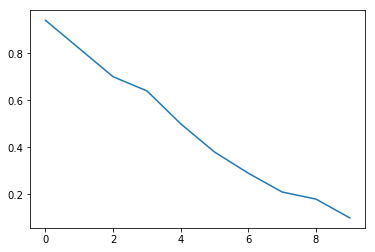

In [8]:
show_performance(encoder,x_test,100)

        eh 	         et
    kecske 	         et
     kutya 	         et
     aytuk 	         et
    macska 	         et
 árvíztűrő 	         et
      fúró 	         et
     kacsa 	         et
         a 	         et
        és 	         et

Accuracy on data:  55.00000000000001 %


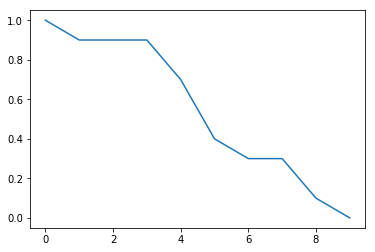

In [10]:
show_performance(encoder,["eh","kecske","kutya","aytuk","macska","árvíztűrő","fúró","kacsa","a","és"])